# Problem statement - There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating. 

Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("chrome_reviews.csv")

In [3]:
data.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [5]:
data.shape

(7204, 10)

In [6]:
data1=data[['Text','Star']]

In [7]:
data1.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [8]:
ax=data1['Star'].value_counts().sort_index()
ax

1    1894
2     336
3     451
4     652
5    3871
Name: Star, dtype: int64

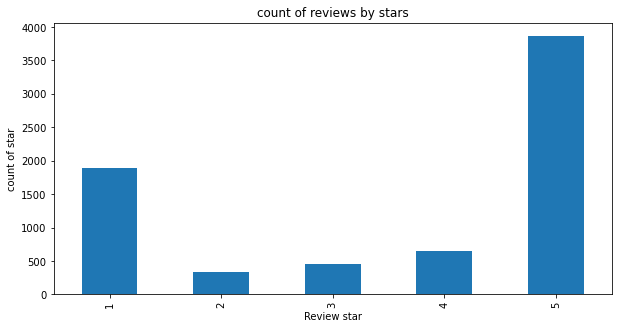

In [9]:
ax=data1['Star'].value_counts().sort_index().plot(kind='bar',title='count of reviews by stars',figsize=(10,5))
ax.set_xlabel('Review star')
ax.set_ylabel('count of star')
plt.show()

In [10]:
data1.isnull().sum()

Text    1
Star    0
dtype: int64

In [11]:
data1.dropna()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1
...,...,...
7199,Bagusss..,5
7200,Bad version 😔,1
7201,One thing that I have to say I can't spelled t...,5
7202,Excellent,5


In [12]:
import nltk
import re
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91917\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
ps=PorterStemmer()
def clean_text(text):
    text=re.sub('[^a-zA-Z]'," ", text)
    text=text.lower()
    text=text.split()
    text=[ps.stem(word) for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    return text
clean= lambda x:clean_text(str(x))

In [14]:
data1['Text']=data1['Text'].apply(clean)

<ipython-input-14-e4a062a34401>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Text']=data1['Text'].apply(clean)


In [15]:
data1.head()

,Text,Star
0,helpful aap,5
1,good,3
2,abl updat neither abl uninstal,1
3,nice app,4
4,mani unwant ad,1


In [16]:
data1["lenght"]=data1['Text'].apply(lambda x:len(str(x)))
data1.head()

<ipython-input-16-e86e80383b86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["lenght"]=data1['Text'].apply(lambda x:len(str(x)))


,Text,Star,lenght
0,helpful aap,5,11
1,good,3,4
2,abl updat neither abl uninstal,1,30
3,nice app,4,8
4,mani unwant ad,1,14


In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91917\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
sid=SentimentIntensityAnalyzer()
data1.head()

,Text,Star,lenght
0,helpful aap,5,11
1,good,3,4
2,abl updat neither abl uninstal,1,30
3,nice app,4,8
4,mani unwant ad,1,14


In [19]:
data1["sentiment_Score"] = data1["Text"].apply(lambda review:sid.polarity_scores(review))
data1.head()

<ipython-input-19-70a5cbbfa8f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["sentiment_Score"] = data1["Text"].apply(lambda review:sid.polarity_scores(review))


,Text,Star,lenght,sentiment_Score
0,helpful aap,5,11,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
1,good,3,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,abl updat neither abl uninstal,1,30,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,nice app,4,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
4,mani unwant ad,1,14,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [20]:
data1["sentiment_Compound_Score"]  = data1['sentiment_Score'].apply(lambda x: x['compound'])
data1.head()

<ipython-input-20-6b4ce9566a35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["sentiment_Compound_Score"]  = data1['sentiment_Score'].apply(lambda x: x['compound'])


,Text,Star,lenght,sentiment_Score,sentiment_Compound_Score
0,helpful aap,5,11,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215
1,good,3,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
2,abl updat neither abl uninstal,1,30,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,nice app,4,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215
4,mani unwant ad,1,14,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [21]:
data1=data1[data1.Star<3]
data1.shape

(2230, 5)

In [22]:
data1["Review_type"] = data1["sentiment_Compound_Score"].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
data1.head()

,Text,Star,lenght,sentiment_Score,sentiment_Compound_Score,Review_type
2,abl updat neither abl uninstal,1,30,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,mani unwant ad,1,14,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
8,bad app,1,7,"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",-0.5423,negative
9,mani time tri updat updat whenev tri use app f...,1,64,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
12,app get updat get open say u r use old version...,1,62,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,positive


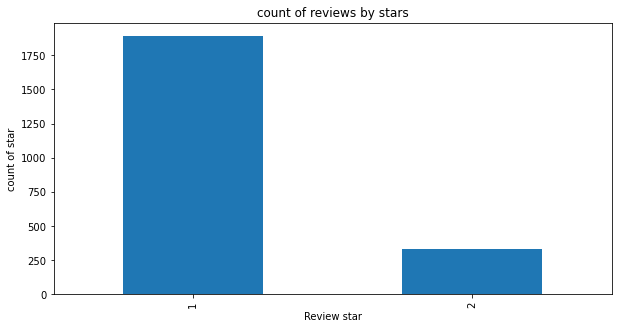

In [23]:
ax=data1['Star'].value_counts().sort_index().plot(kind='bar',title='count of reviews by stars',figsize=(10,5))
ax.set_xlabel('Review star')
ax.set_ylabel('count of star')
plt.show()

In [24]:
positive_review_with_one_star=data1[data1.Review_type=='positive']

In [25]:
positive_review_with_one_star.head()

,Text,Star,lenght,sentiment_Score,sentiment_Compound_Score,Review_type
12,app get updat get open say u r use old version...,1,62,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.0772,positive
15,come real statu thank,1,21,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.3612,positive
19,want download greana free fire com file,1,39,"{'neg': 0.218, 'neu': 0.364, 'pos': 0.418, 'co...",0.2960,positive
42,okk kind bad brave,1,18,"{'neg': 0.31, 'neu': 0.088, 'pos': 0.602, 'com...",0.5106,positive
48,unabl updat load crash time unrespons good rel...,1,61,"{'neg': 0.199, 'neu': 0.588, 'pos': 0.213, 'co...",0.0516,positive


In [29]:
positive_review_with_one_star[['Star','Review_type','Text']]

,Star,Review_type,Text
12,1,positive,app get updat get open say u r use old version...
15,1,positive,come real statu thank
19,1,positive,want download greana free fire com file
42,1,positive,okk kind bad brave
48,1,positive,unabl updat load crash time unrespons good rel...
...,...,...,...
7047,1,positive,good
7051,1,positive,helpful
7147,2,positive,abl updat app reason month help
7151,1,positive,good updat


In [27]:
positive_review_with_one_star.shape

(491, 6)

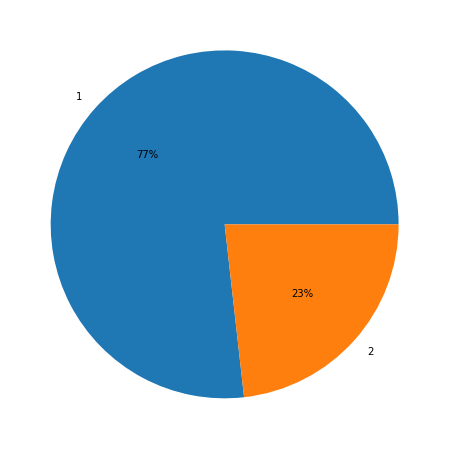

In [28]:
plt.figure(figsize=(10,8))
plt.pie(positive_review_with_one_star["Star"].value_counts(), 
        labels = positive_review_with_one_star["Star"].value_counts().index, autopct="%.0f%%")
plt.show()